# Data cleanining
## Imports

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

## Load data in DataFrame

In [12]:
# Read data
data = pd.read_csv("./Data/Immoweb_scraping_result.csv")

## Look at data

In [3]:
# First look
data.head()

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
0,20320744,1150,APARTMENT,APARTMENT,575000,residential_sale,3,160.0,1.0,0.0,...,1.0,40.0,1.0,290.0,290.0,NaN,NaN,0.0,GOOD,single
1,20317718,9000,APARTMENT,APARTMENT,390000,residential_sale,3,96.0,1.0,0.0,...,1.0,29.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
2,20315842,9051,APARTMENT,APARTMENT,260000,residential_sale,1,76.0,1.0,0.0,...,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
3,20315799,9051,APARTMENT,APARTMENT,325000,residential_sale,1,81.0,1.0,0.0,...,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
4,20315776,9051,APARTMENT,APARTMENT,365000,residential_sale,3,101.0,1.0,0.0,...,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound


In [13]:
# Number rows and columns
data.shape

(15516, 21)

## Find and handle duplicates

In [14]:
# Complete duplicates

duplicates_complete = data.duplicated(keep= False) # On all columns, show all the duplicates (keep none, first or last)
data[duplicates_complete].sort_values(by= 'id') # Complete duplicates


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
499,9380777,8430,APARTMENT,APARTMENT,311500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
1402,9380777,8430,APARTMENT,APARTMENT,311500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
13036,9380780,8430,APARTMENT,APARTMENT,297000,residential_sale,2,82.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
12133,9380780,8430,APARTMENT,APARTMENT,297000,residential_sale,2,82.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
5282,9380781,8430,APARTMENT,APARTMENT,321500,residential_sale,2,79.0,NaN,NaN,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,20319797,9100,HOUSE,HOUSE,430000,residential_sale,5,188.0,1.0,NaN,...,1.0,NaN,1.0,120.0,120.0,375.0,NaN,NaN,NaN,single
6083,20320128,8310,HOUSE,VILLA,245000,residential_sale,3,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,301.0,NaN,NaN,TO_RENOVATE,single
13840,20320128,8310,HOUSE,VILLA,245000,residential_sale,3,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,301.0,NaN,NaN,TO_RENOVATE,single
9962,20320926,8200,HOUSE,EXCEPTIONAL_PROPERTY,1935000,residential_sale,6,718.0,1.0,0.0,...,1.0,NaN,NaN,NaN,NaN,5085.0,4.0,1.0,AS_NEW,single


In [15]:
# 3096 rows.... drop complete duplicates
# 1551 rows / 15516 = 10% data
data.drop_duplicates(inplace= True)
data.shape

(13965, 21)

In [16]:
# Based on ImmoWeb code - 0 rows, good!
duplicates_code = data.duplicated(['id'], keep= False) # On id, show all the duplicates (keep none, first or last)
data[duplicates_code].sort_values(by= 'id') # Duplicated immoweb id

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing


In [17]:
# Check for duplicates on everything except code - 1402 rows.... 
# some clearly duplicates, others are just multiple similar apartments in new project

duplicates_other = data.duplicated(subset= list(data.columns)[1:], keep= False)
data[duplicates_other].sort_values(by= ['Locality', 'Price'])


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
427,9887765,1000,APARTMENT,APARTMENT,216500,residential_sale,1,24.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
3284,20027573,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
4306,9887769,1000,APARTMENT,APARTMENT,216500,residential_sale,1,24.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
11041,20027550,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
12063,9887764,1000,APARTMENT,APARTMENT,216500,residential_sale,1,24.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,20317621,9940,APARTMENT,GROUND_FLOOR,410000,residential_sale,3,146.0,1.0,0.0,...,1.0,29.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,single
9,20317589,9940,APARTMENT,PENTHOUSE,445000,residential_sale,2,122.0,1.0,0.0,...,1.0,48.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
5951,20317623,9940,APARTMENT,PENTHOUSE,445000,residential_sale,2,122.0,1.0,0.0,...,1.0,48.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,single
6753,20317652,9940,APARTMENT,PENTHOUSE,445000,residential_sale,2,122.0,1.0,0.0,...,1.0,48.0,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound


In [18]:
# Since are duplicated in ALL values, except for ID - assume are duplicated listings
# To check, this loses 843 rows - representing 5.43% of original data

column_names = list(data.columns)[1:]
data.drop_duplicates(subset = column_names, inplace= True)
data.shape

(13122, 21)

In [19]:
# Check for duplicates on postal code, price etc
# Based on compound properties with multiple similar listings, multiple listings for different agenciies...
# Check how much data lose if just completely remove all these duplicates, keeping, in theory, only one property per compound property
# And per multiple listing for same property
# Data cleaner, no influence on means, medians etc.... better for analysis
# Does not represent huge amount of data to lose
# Go through case by case too labour-intensive for practical purposes

duplicates_postpricearea = data.duplicated(['Locality', 'Price', 'Living Area', 'Number of rooms'], keep= False)
data[duplicates_postpricearea].sort_values(by= ['Locality', 'Price'])


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
3284,20027573,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,compound
4859,20135500,1000,APARTMENT,KOT,216500,residential_sale,0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,single
1036,20320688,1000,APARTMENT,FLAT_STUDIO,260000,residential_sale,0,40.0,NaN,NaN,...,1.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,compound
3999,20296287,1000,APARTMENT,FLAT_STUDIO,260000,residential_sale,0,40.0,NaN,0.0,...,1.0,3.0,NaN,NaN,NaN,NaN,2.0,0.0,GOOD,compound
1439,10455138,1000,APARTMENT,FLAT_STUDIO,265000,residential_sale,0,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11151,10132129,9940,APARTMENT,APARTMENT,445000,residential_sale,2,122.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS_NEW,compound
968,10588070,9961,APARTMENT,APARTMENT,339750,residential_sale,3,127.0,1.0,0.0,...,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,single
1370,10588074,9961,APARTMENT,APARTMENT,339750,residential_sale,3,130.0,1.0,0.0,...,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound
5249,10588073,9961,APARTMENT,APARTMENT,339750,residential_sale,3,127.0,1.0,0.0,...,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,compound


In [22]:
# dropped 1197 / 15516 lines = 7.71% data loss
# Large amount of observations - but final dataset still above 10.000 observations AND cleaner than if left duplicates
# Value clean data, and remove influence of duplication on analysis rather than amount of data
# Pretty sure now that all rows in dataset are individual properties - even if lost properties very similar in new projects

column_names = ['Locality', 'Price', 'Living Area', 'Number of rooms']
data.drop_duplicates(subset = column_names, inplace= True)
data.shape

(11925, 21)

Total number of rows eliminated = 15516 - 11925 = 3591
Percentage of total - 3591/15516 = 23.14%

## Data type constraints

In [40]:
# Check data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11925 entries, 0 to 15515
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                11925 non-null  int64  
 1   Locality                          11925 non-null  object 
 2   Type of property                  11925 non-null  object 
 3   Subtype of property               11925 non-null  object 
 4   Price                             11925 non-null  float64
 5   Type of sale                      11925 non-null  object 
 6   Number of rooms                   11925 non-null  int64  
 7   Living Area                       11736 non-null  float64
 8   Fully equipped kitchen            11925 non-null  object 
 9   Furnished                         5540 non-null   object 
 10  Fireplace                         11925 non-null  object 
 11  Terrace                           11925 non-null  object 
 12  Terrace a

In [24]:
# Fix data types
# Boolean 0/1 values pres-abs can be left in float to preserve NaN ; int doesn't take NaN and not necessary to convert to string
# OPM : for EDA, but in modelling, does leaving float assume continuous variable and error, instead of one-hot encoding
# Fireplace int (because no missing data)

data['Locality'] = data['Locality'].astype('str')
data['Price'] = data['Price'].astype('float')
data['Fully equipped kitchen'] = data['Fully equipped kitchen'].astype('str')
data['Fully equipped kitchen'] = data['Fully equipped kitchen'].replace('nan', np.nan)
data['Furnished'] = data['Furnished'].astype('str')
data['Furnished'] = data['Furnished'].replace('nan', np.nan)
data['Fireplace'] = data['Fireplace'].astype('str')
data['Fireplace'] = data['Fireplace'].replace('nan', np.nan)
data['Terrace'] = data['Terrace'].astype('str')
data['Terrace'] = data['Terrace'].replace('nan', np.nan)
data['Garden'] = data['Garden'].astype('str')
data['Garden'] = data['Garden'].replace('nan', np.nan)
# Cannot change number of facades to int until all NaN resolved
#data['Number of facades'] = data['Number of facades'].fillna(-1).astype('int64')
#data['Number of facades'] = data['Number of facades'].replace(-1, np.nan)
data['Swimming pool'] = data['Swimming pool'].astype('str')
data['Swimming pool'] = data['Swimming pool'].replace('nan', np.nan)



## Missing Data

### Amount missing per column/variable/feature

In [25]:
data_nullity = data.isna()
missingness = data_nullity.sum().to_frame("missing_count")
missingness['percent_NaN'] = missingness['missing_count'] / data.shape[0]
missingness['percent_NaN'] = missingness['percent_NaN'].round(2)
missingness

,missing_count,percent_NaN
id,0,0.00
Locality,0,0.00
Type of property,0,0.00
Subtype of property,0,0.00
Price,0,0.00
Type of sale,0,0.00
Number of rooms,0,0.00
Living Area,189,0.02
Fully equipped kitchen,3633,0.30
Furnished,6385,0.54


### Looking at patterns in missingness

<Axes: >

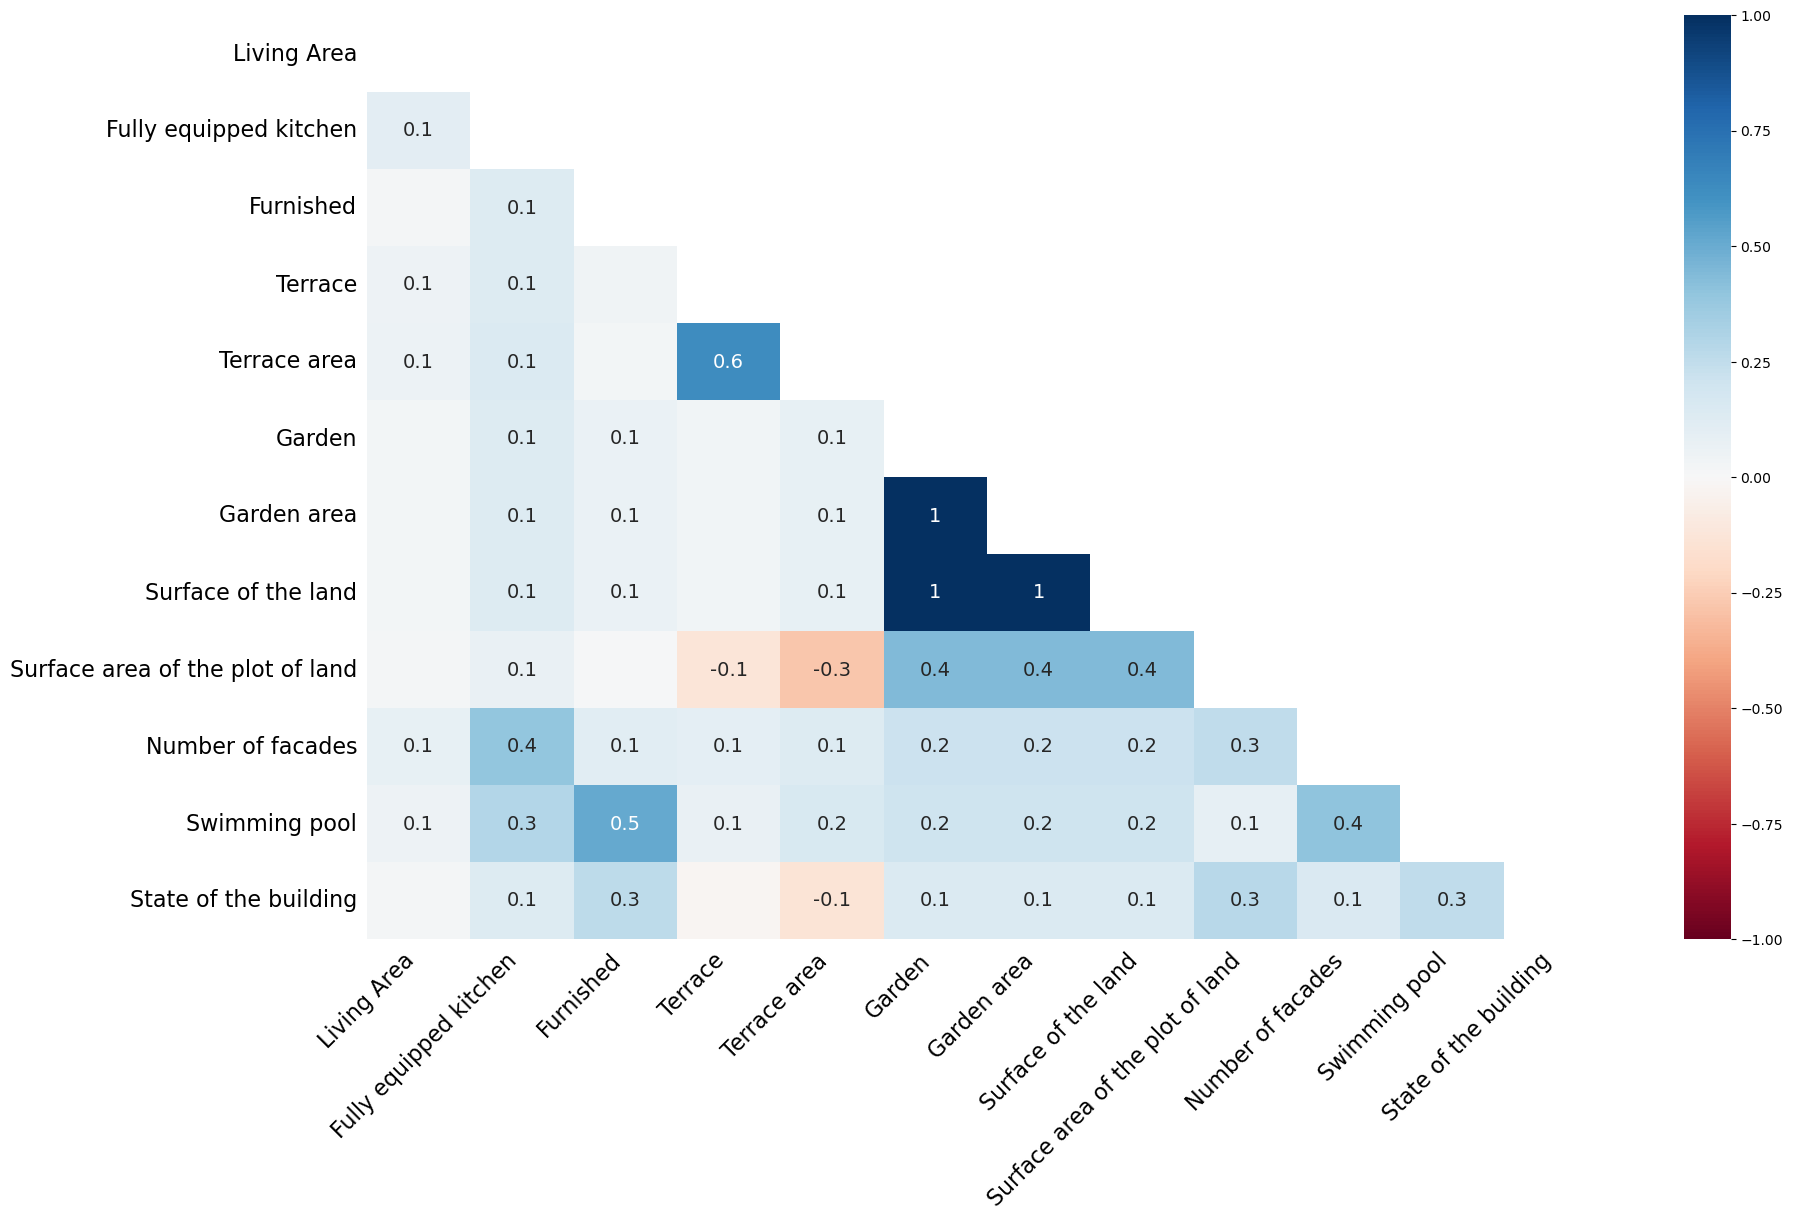

In [26]:
# Correlations in missingness between variables/columns/features

msno.heatmap(data)

<Axes: >

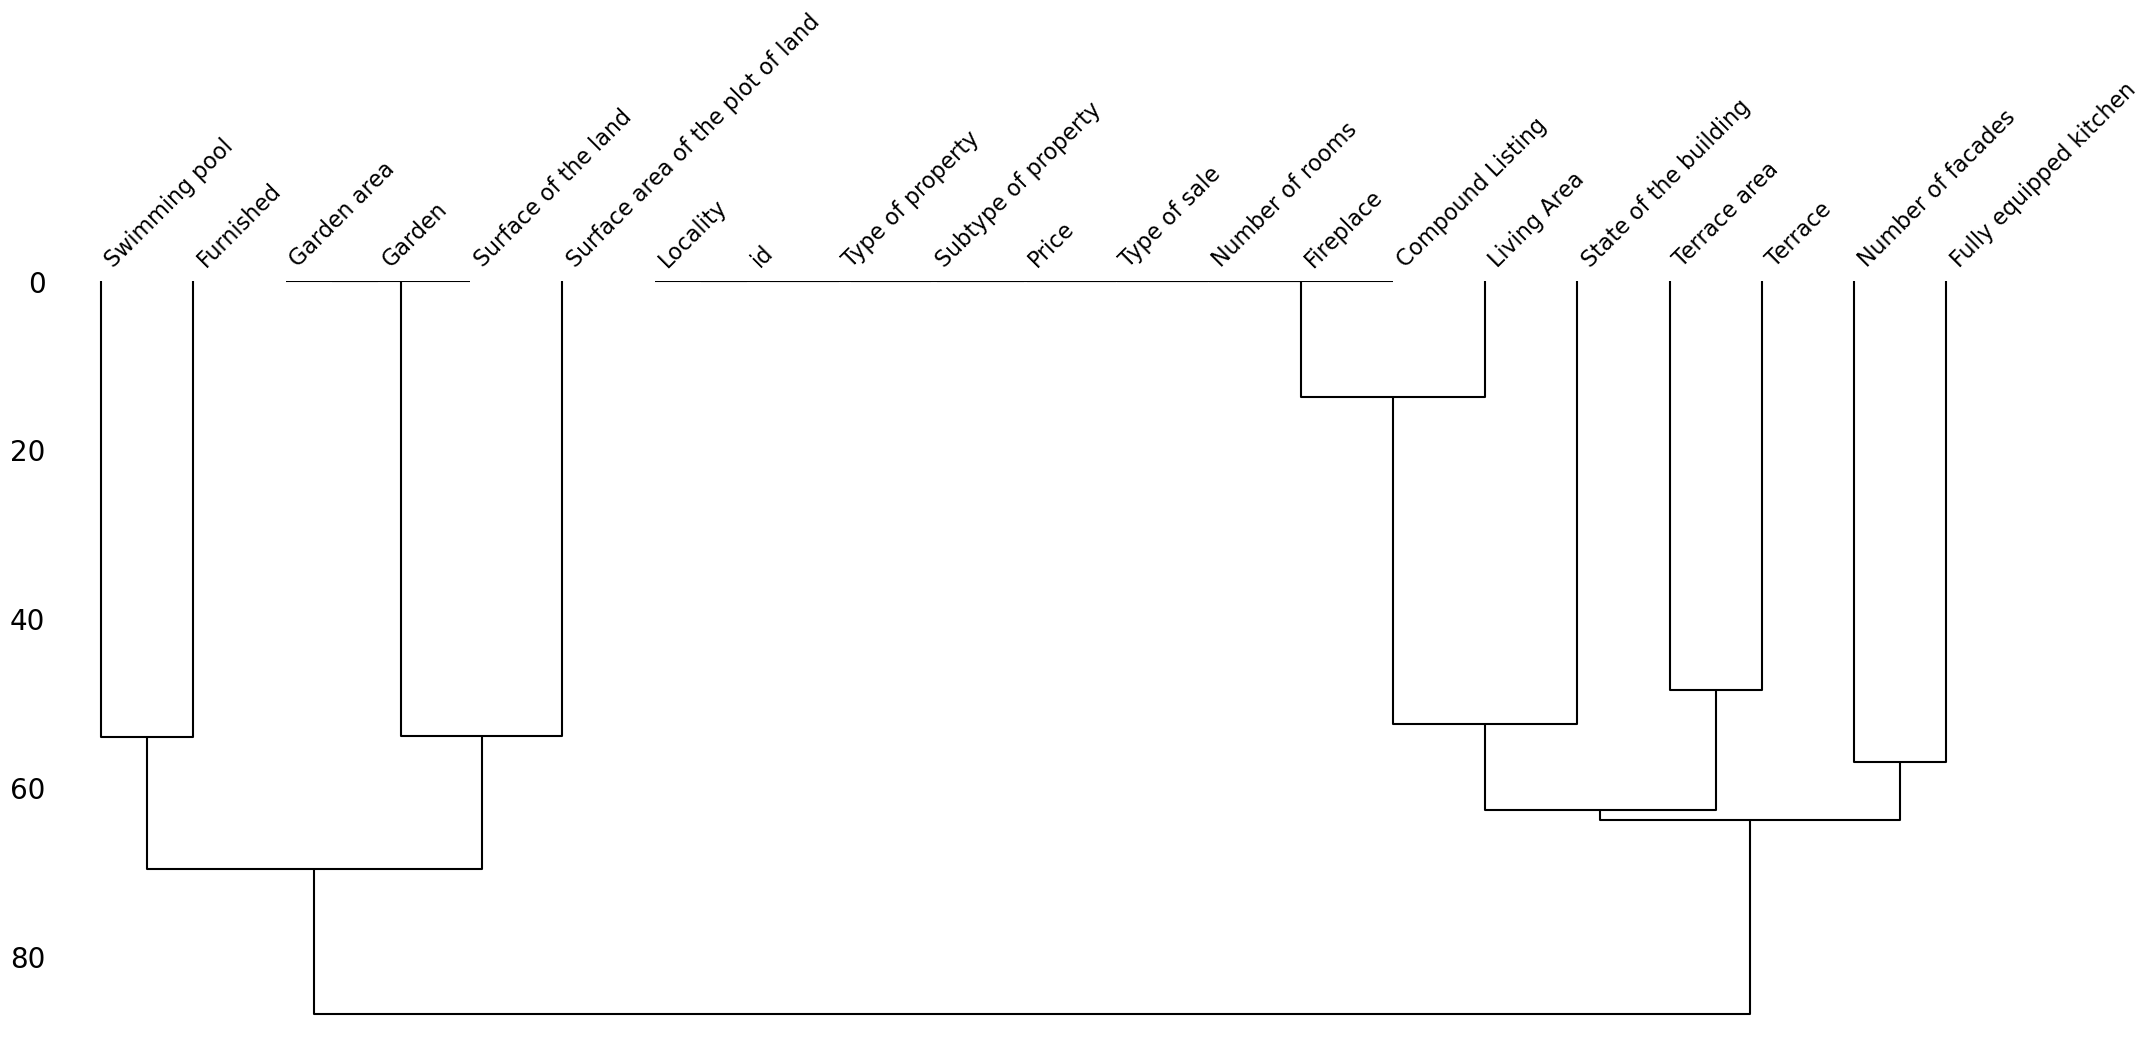

In [143]:
msno.dendrogram(data)

<Axes: >

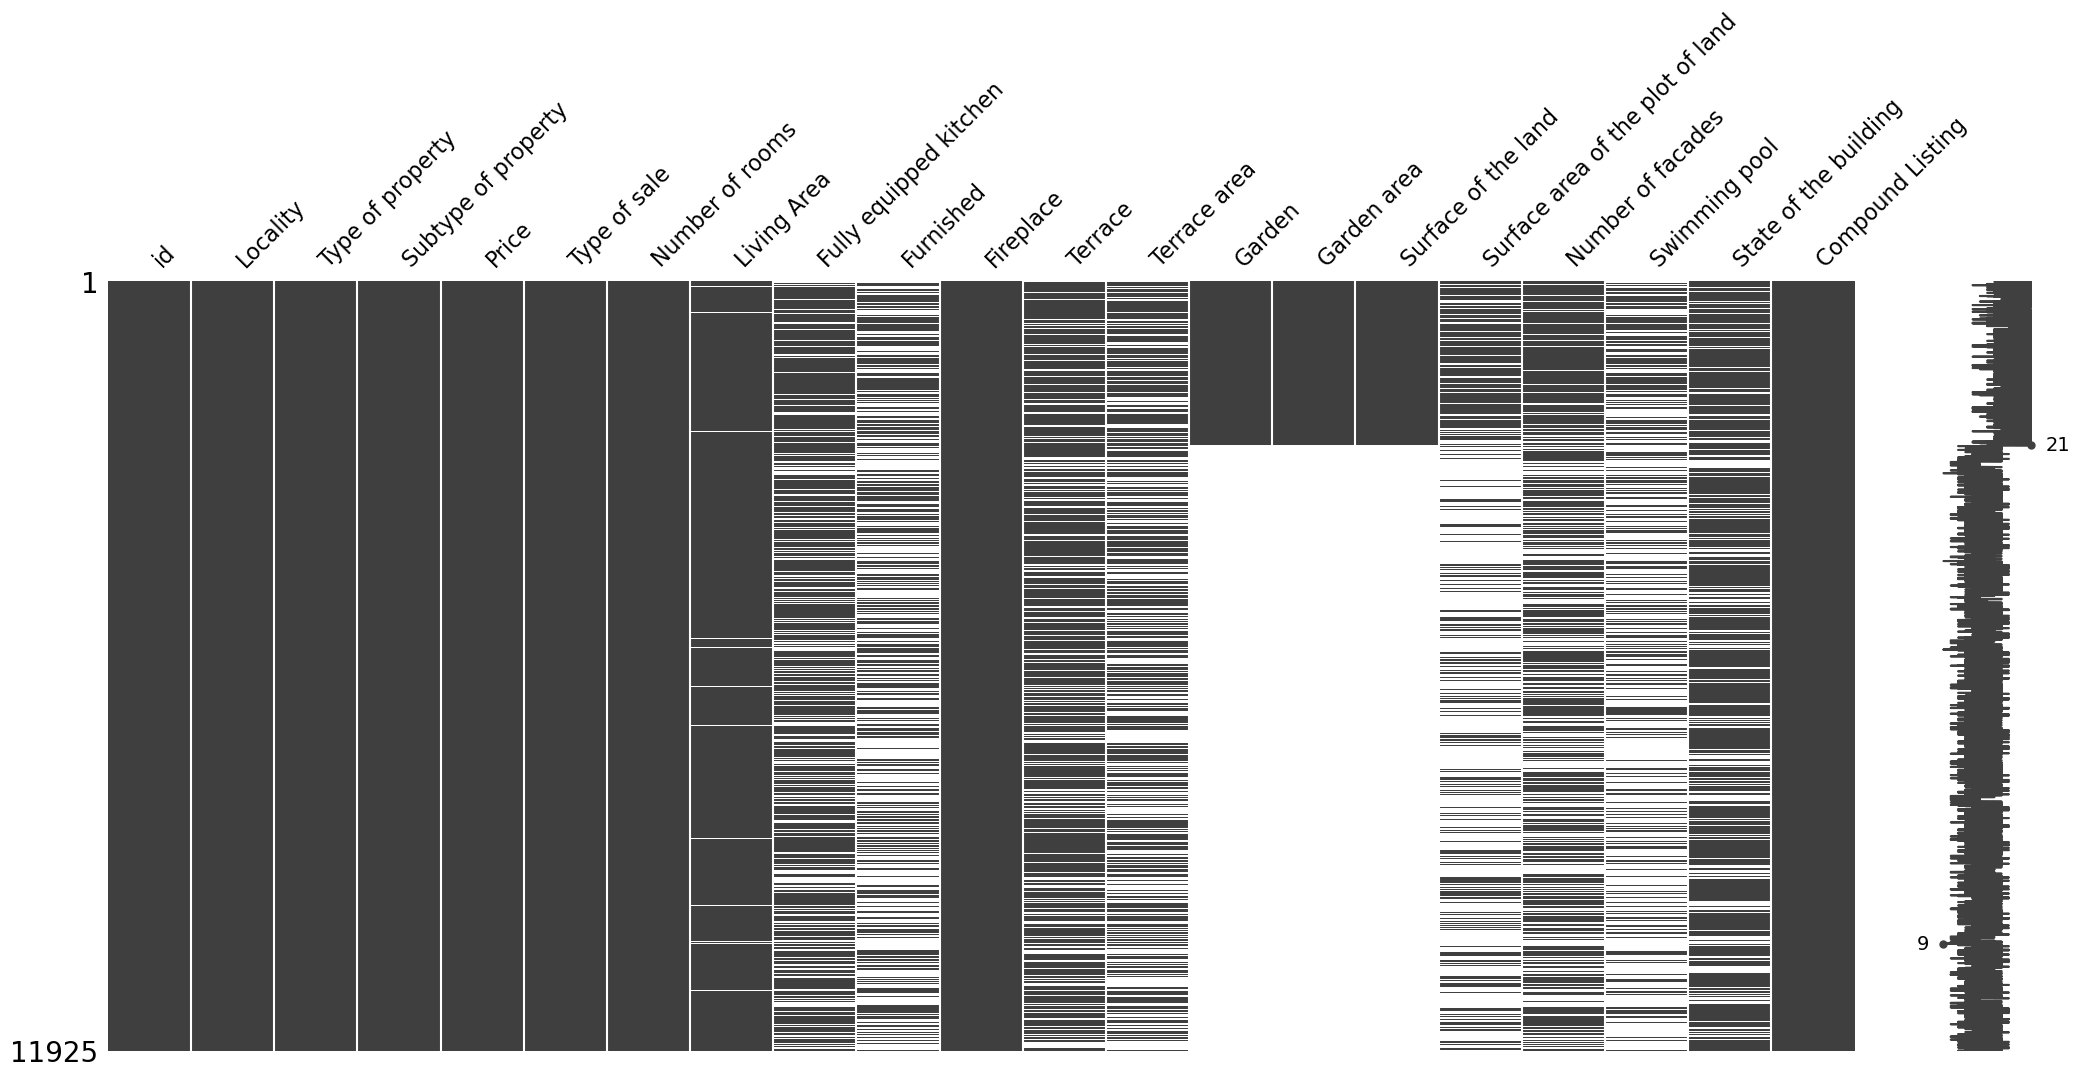

In [27]:
# All values for garden presence/absence are either 1 or NaN - all NaN are 0, no garden

#data['Garden'].value_counts()

# The pattern of missing data in Garden presence and Garden size
# All values of missing data for garden presence and size can be set to 0
# Include Surface of the land which is == to Garden area

gardens = data.sort_values('Garden')
msno.matrix(gardens)

In [28]:
data['Garden'] = data['Garden'].fillna('0')
data['Garden area'] = data['Garden area'].fillna(0.0)
data['Surface of the land'] = data['Surface of the land'].fillna(0.0)

In [29]:
# Recode 1.0 to 1

data['Garden'] = data['Garden'].replace(to_replace= '1.0', value= '1')

data['Garden'].value_counts()

Garden
0    9380
1    2545
Name: count, dtype: int64

<Axes: >

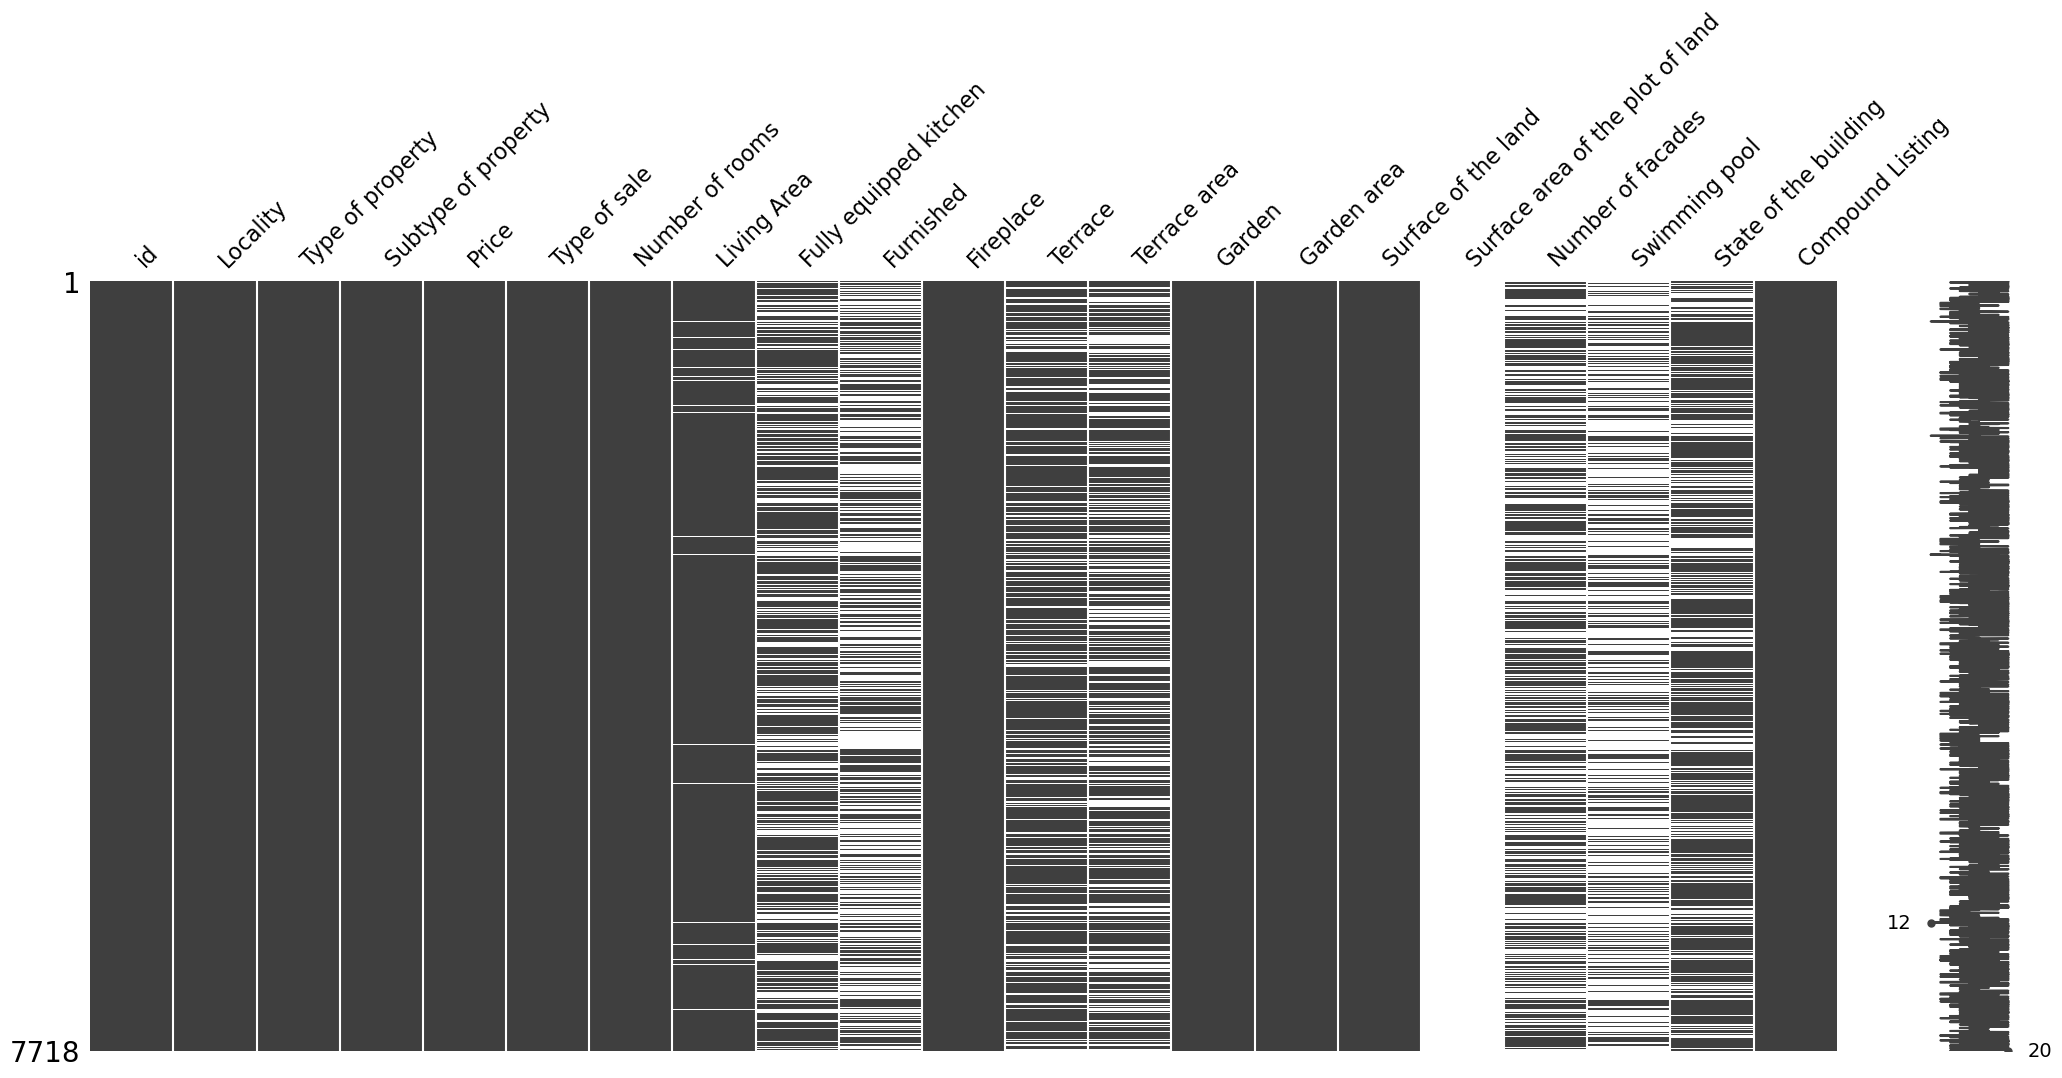

In [30]:
# Patterns in missing data for surface of the complete plot according to property type

apartments = data[data['Type of property'] == 'APARTMENT']
msno.matrix(apartments)
# Only filled in when a house - all NaN can be set to 0 because apartments don't have total plot

#houses = data[data['Type of property'] == 'HOUSE']
#msno.matrix(houses)

#property_type = data.sort_values('Type of property')
#msno.matrix(property_type)

In [31]:
data['Surface area of the plot of land'] = data['Surface area of the plot of land'].fillna(0.0)

<Axes: >

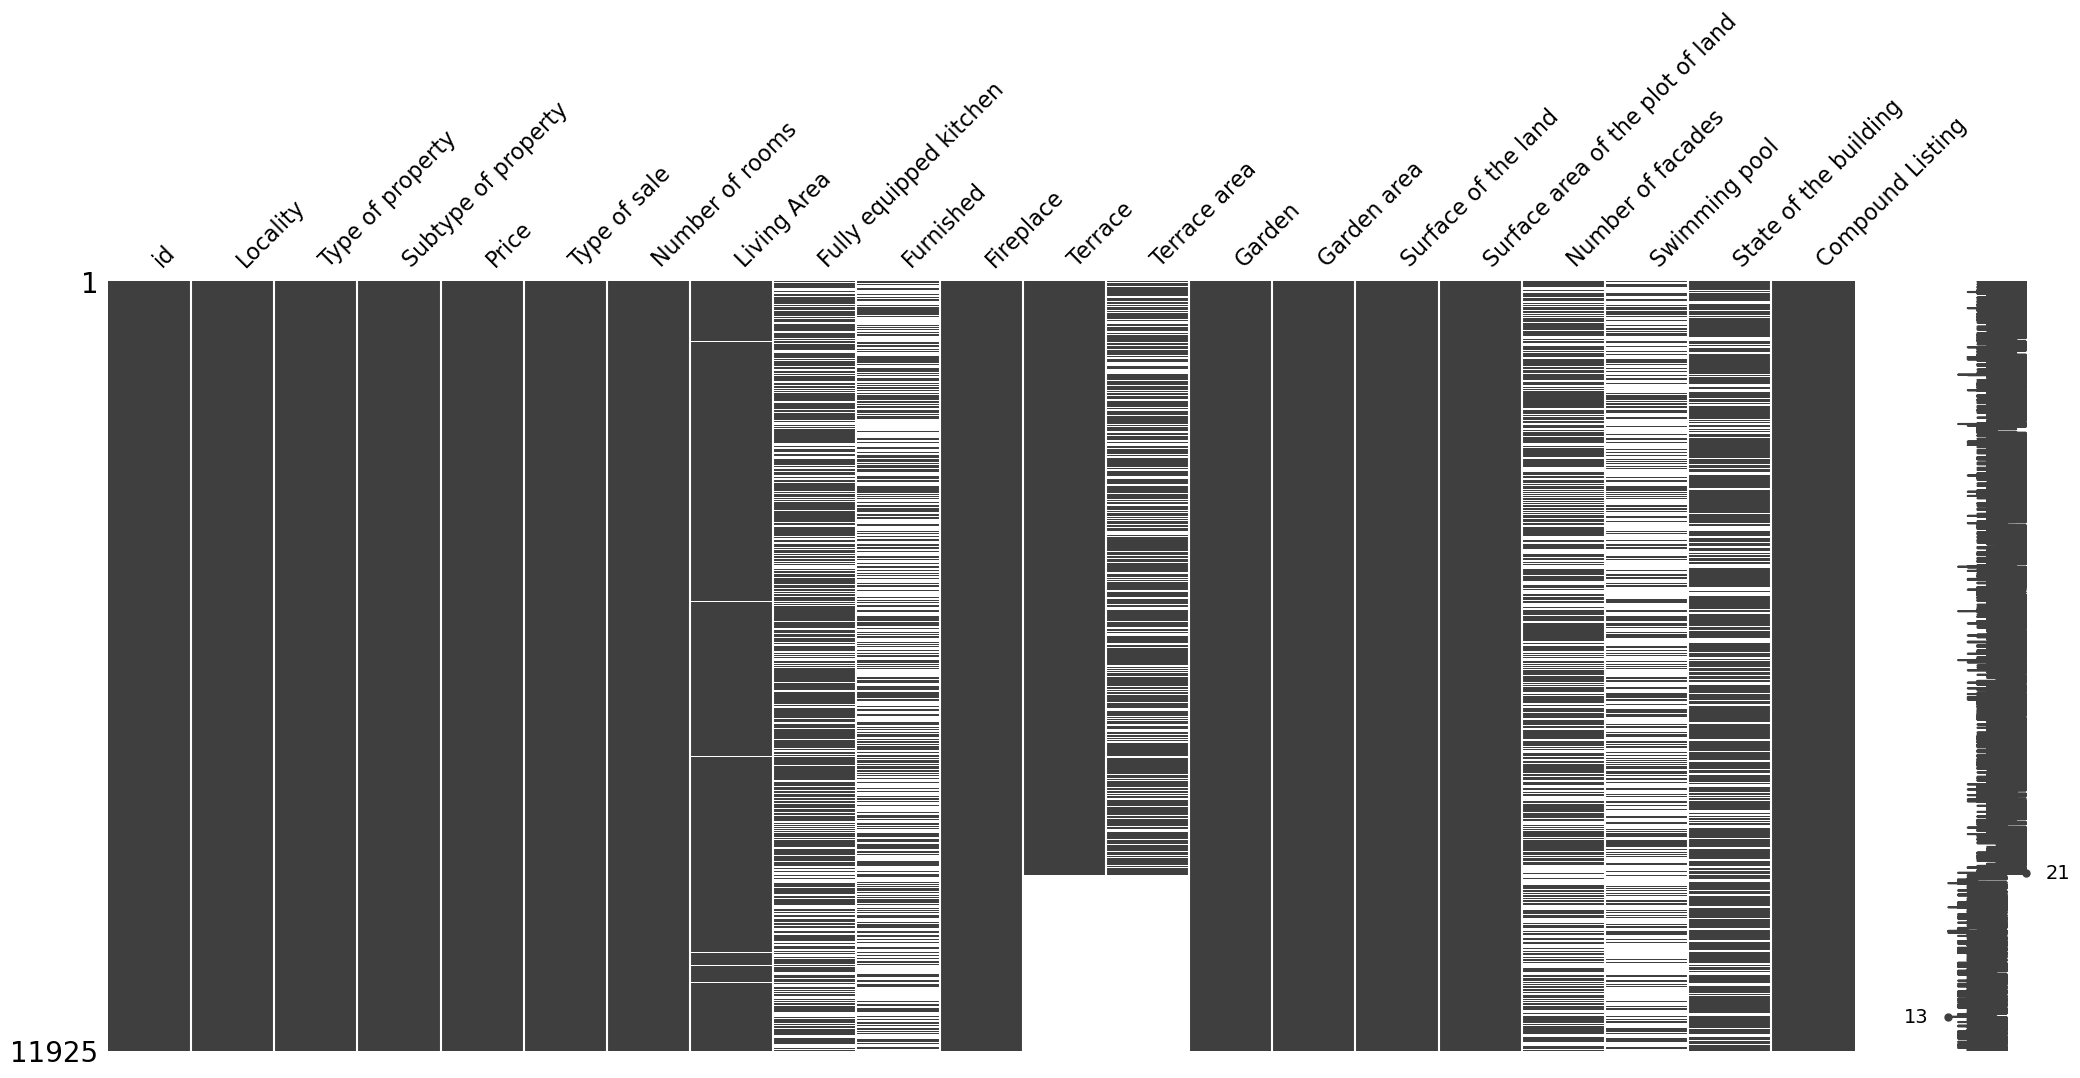

In [32]:
# Terrace area according to terrace presence
# Clearly absent terraces have a surface of 0, so replace them

terrace = data.sort_values('Terrace')
msno.matrix(terrace)

In [33]:
data['Terrace'] = data['Terrace'].fillna('0')
data.loc[data['Terrace'] == '0', 'Terrace area'] = data.loc[data['Terrace'] == '0', 'Terrace area'].fillna(0.0)

In [34]:
# Recode Terrace values 1.0 to 1

data['Terrace'] = data['Terrace'].replace(to_replace= '1.0', value= '1')

data['Terrace'].value_counts()

Terrace
1    9202
0    2723
Name: count, dtype: int64

In [35]:
# Swimming pool, assume if it's there would want to advertise it - NaN = 0
data['Swimming pool'] = data['Swimming pool'].fillna('0.0')

In [36]:
# Recode values swimming pool

data['Swimming pool'] = data['Swimming pool'].replace(to_replace= '1.0', value= '1')
data['Swimming pool'] = data['Swimming pool'].replace(to_replace= '0.0', value= '0')

data['Swimming pool'].value_counts()

Swimming pool
0    11692
1      233
Name: count, dtype: int64

In [37]:
# State of the building - impossible to tell, replace NaN with 'Unknown'
data['State of the building'] = data['State of the building'].fillna('UNKNOWN')

In [38]:
# Fully equipped kitchen - all values '1.0' or NaN, replace NaN with '0.0'

data['Fully equipped kitchen'] = data['Fully equipped kitchen'].fillna('0.0')

# change values from '0.0' to '0' and same for 1
data['Fully equipped kitchen'] = data['Fully equipped kitchen'].replace(to_replace= '1.0', value= '1')
data['Fully equipped kitchen'] = data['Fully equipped kitchen'].replace(to_replace= '0.0', value= '0')

data['Fully equipped kitchen'].value_counts()

Fully equipped kitchen
1    8292
0    3633
Name: count, dtype: int64

<Axes: >

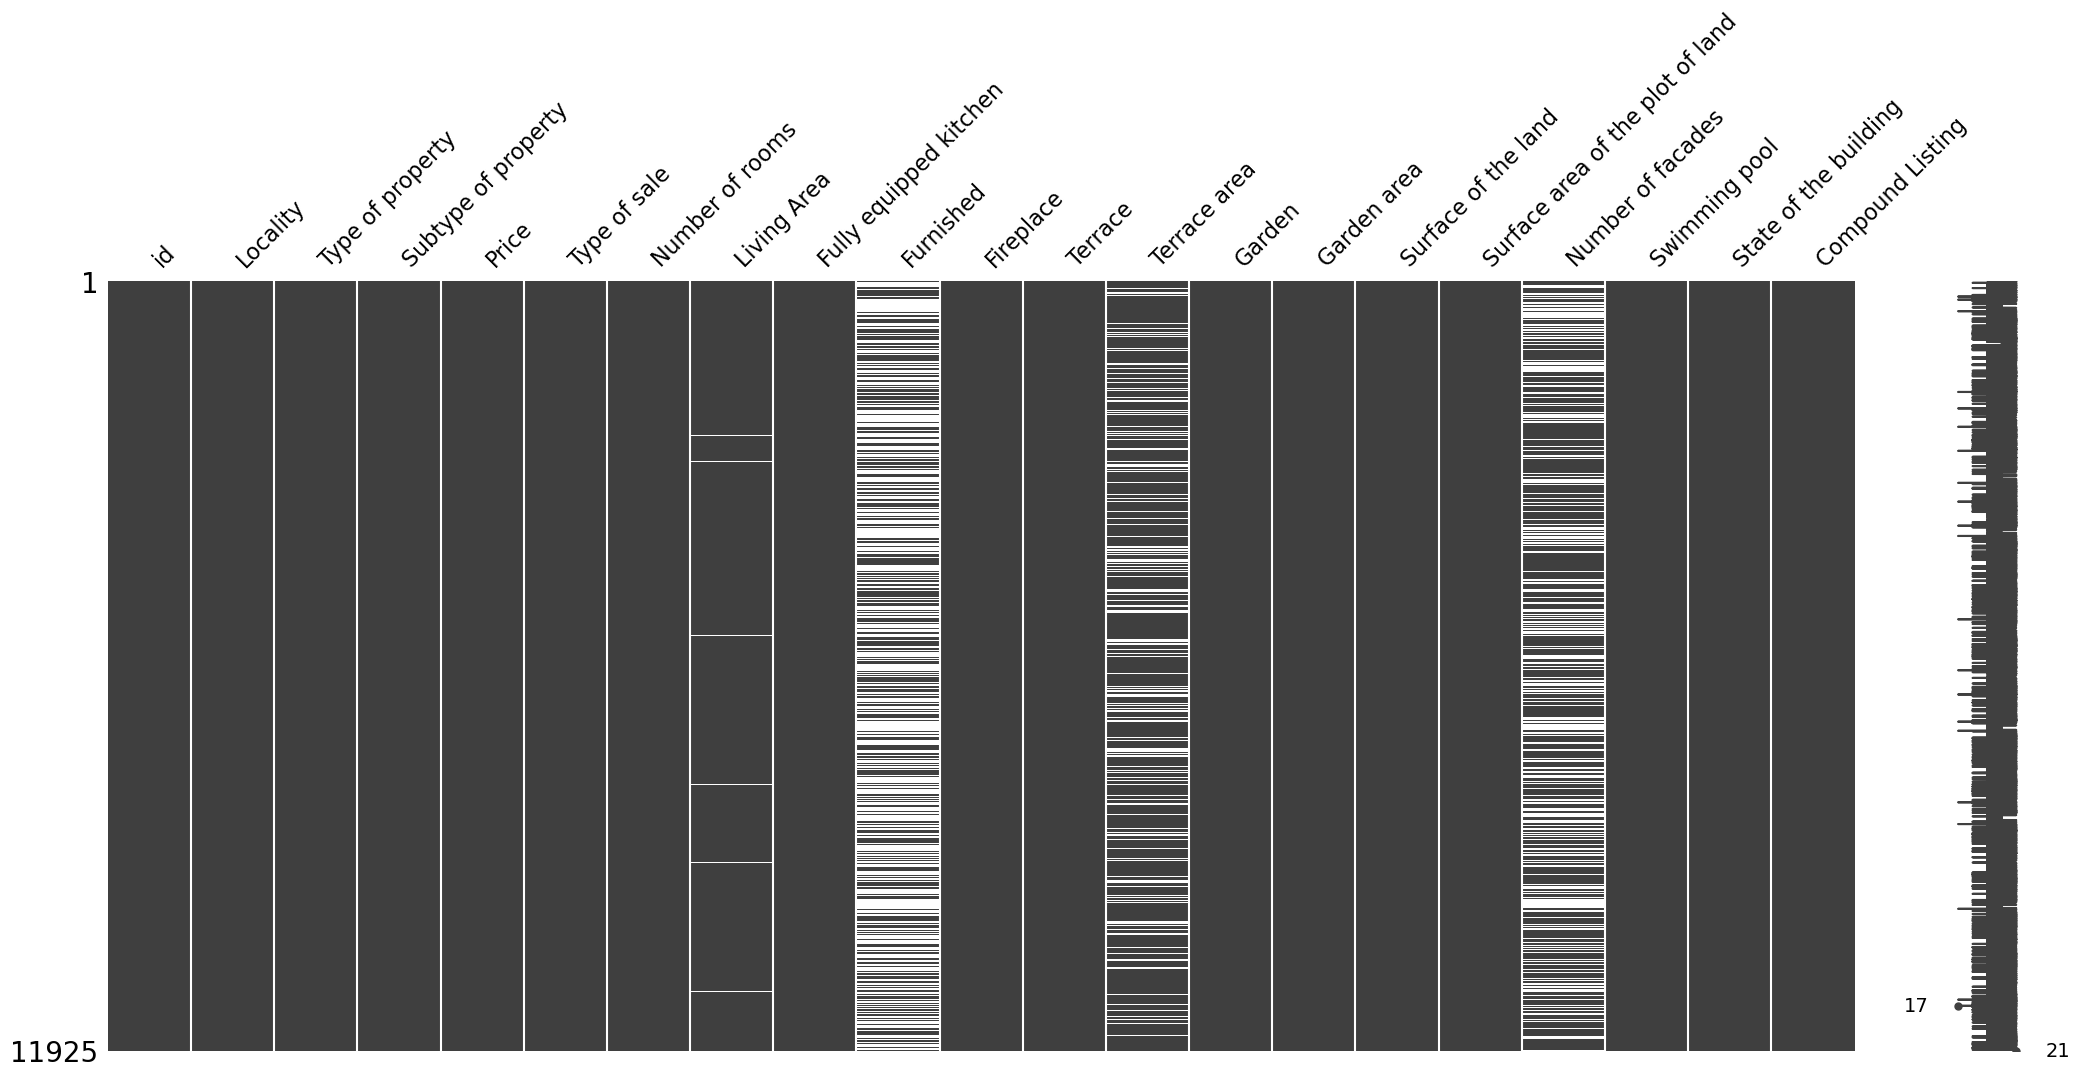

In [39]:
# Verify missingness after imputations
msno.matrix(data)

Imputing other missing values requires more advanced technique, remove outliers first to address issues, then use KNN imputation.

## Verifying categorical values - value consistency
### Postal code

In [41]:


data[data['Locality'].apply(lambda x: len(x) != 4)] # All postalcodes are 4 digits long


,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing


### Type of property
All properties either APARTMENT or HOUSE


In [42]:
data['Type of property'].value_counts()


Type of property
APARTMENT    7718
HOUSE        4207
Name: count, dtype: int64

### Subtype of property
Many different categories and strong group imbalance
BUT subtype - so exclude from analysis
- reassign those can reassign
- drop really low categories

In [43]:
data['Subtype of property'].value_counts()

Subtype of property
APARTMENT               6355
HOUSE                   3154
VILLA                    397
GROUND_FLOOR             381
PENTHOUSE                330
FLAT_STUDIO              270
DUPLEX                   235
MIXED_USE_BUILDING       168
APARTMENT_BLOCK          152
EXCEPTIONAL_PROPERTY      76
MANSION                   76
TOWN_HOUSE                53
COUNTRY_COTTAGE           53
BUNGALOW                  47
KOT                       45
SERVICE_FLAT              44
LOFT                      40
FARMHOUSE                 18
TRIPLEX                   18
CHALET                     5
MANOR_HOUSE                4
CASTLE                     3
OTHER_PROPERTY             1
Name: count, dtype: int64

### Type of sale
All are of same type - residential_sale
-> Drop column

In [44]:
data['Type of sale'].value_counts()

Type of sale
residential_sale    11925
Name: count, dtype: int64

### Compound listing
All of correct values, single or compound

In [45]:
data['Compound Listing'].value_counts()

Compound Listing
single      7388
compound    4537
Name: count, dtype: int64

### State of the building

NaN treated by assigning UNKNOWN, because can't be sure

Strong group imbalance
- GOOD/AS_NEW
- TO_RENOVATE/TO_BE_DONE_UP/JUST_RENOVATED/TO_RESTORE


Reassign values? TO_RENOVATE/TO_BE_DONE_UP/TO_RESTORE and AS_NEW/JUST_RENOVATED

In [46]:
data['State of the building'].value_counts()

State of the building
GOOD              4123
AS_NEW            2887
UNKNOWN           2746
TO_RENOVATE        844
TO_BE_DONE_UP      721
JUST_RENOVATED     576
TO_RESTORE          28
Name: count, dtype: int64

### Furnished
2 values or Nan - ok

need more advanced technique to impute

In [49]:
data['Furnished'].value_counts()

Furnished
0    5165
1     375
Name: count, dtype: int64

In [48]:
# recode '0.0' to '0'

data['Furnished'] = data['Furnished'].replace(to_replace= '1.0', value= '1')
data['Furnished'] = data['Furnished'].replace(to_replace= '0.0', value= '0')

### Fireplace
Two values - ok

In [50]:
data['Fireplace'].value_counts()

Fireplace
0    11545
1      380
Name: count, dtype: int64

### Number of facades


In [51]:
data['Number of facades'].value_counts()

Number of facades
2.0    3991
4.0    2004
3.0    1589
1.0      29
6.0       1
5.0       1
Name: count, dtype: int64

In [171]:
# identify rows with > 4 facades

data[data['Number of facades'] > 4]

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
1655,20157198,1640,HOUSE,VILLA,1250000.0,residential_sale,6,500.0,1,NaN,...,1,70.0,1,570.0,570.0,1768.0,6.0,0,AS_NEW,single
11517,20147859,1800,APARTMENT,APARTMENT,397296.0,residential_sale,2,119.0,1,NaN,...,1,12.0,0,0.0,0.0,0.0,5.0,0,AS_NEW,single


In [52]:
# replace values 5 and 6, impossible, to realistic maximum 4 facades

data['Number of facades'] = data['Number of facades'].replace(to_replace= 5.0, value= 4.0)
data['Number of facades'] = data['Number of facades'].replace(to_replace= 6.0, value= 4.0)

Further imputation requires more advanced method

Need to impute all NaNs before changing to int type

## Verifying numerical data

In [115]:
data[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface of the land', 'Surface area of the plot of land', 'Number of facades']].describe()

,Price,Number of rooms,Living Area,Terrace area,Garden area,Surface of the land,Surface area of the plot of land,Number of facades
count,1.192500e+04,11925.000000,11736.000000,9580.000000,11925.000000,11925.000000,11925.000000,7615.000000
mean,4.430277e+05,2.560252,142.647580,15.990188,112.089476,112.089476,384.011740,2.731714
std,3.858024e+05,1.358437,120.841899,46.668458,643.289748,643.289748,1969.993725,0.854913
min,2.750000e+04,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.600000e+05,2.000000,87.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.480000e+05,2.000000,110.000000,10.000000,0.000000,0.000000,0.000000,2.000000
75%,4.850000e+05,3.000000,164.000000,20.000000,0.000000,0.000000,206.000000,4.000000
max,6.495000e+06,25.000000,4829.000000,3749.000000,18131.000000,18131.000000,64300.000000,4.000000


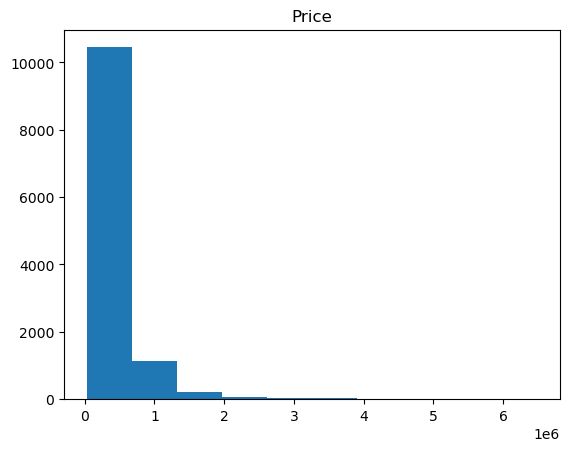

In [ ]:
plt.hist(data['Price'])
plt.title('Price')
plt.show()

# Prices highly skewed with some outliers

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\2612525868.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Price', data=data, palette='Set2')


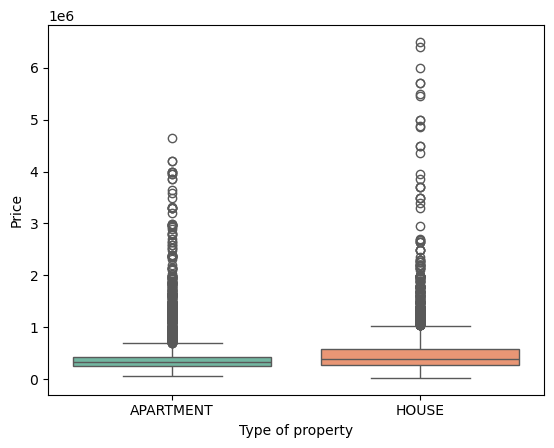

In [ ]:
sns.boxplot(x='Type of property', y='Price', data=data, palette='Set2')

# Add labels and title
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()

# No clear visible difference in price between houses and apartments
# Houses have greater variance in price
# Both groups have outliers

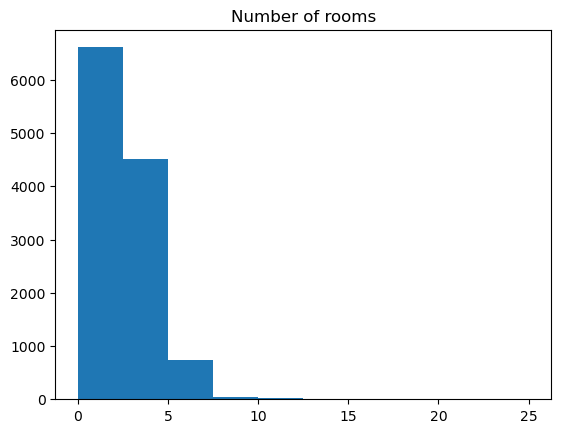

In [ ]:
plt.hist(data['Number of rooms'])
plt.title('Number of rooms')
plt.show()

# very skewed distribution

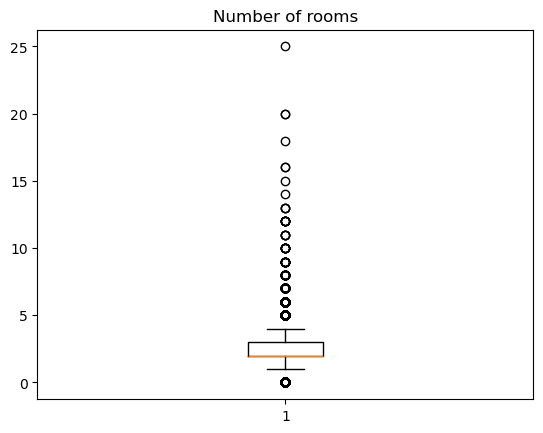

In [ ]:
plt.boxplot(data['Number of rooms'])
plt.title('Number of rooms')
plt.show()

# very skewed distribution, and there are a number of outliers

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\4134656450.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Number of rooms', data=data, palette='Set2')


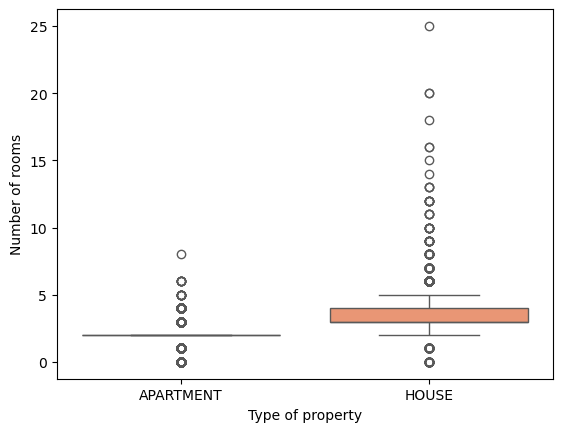

In [ ]:
sns.boxplot(x='Type of property', y='Number of rooms', data=data, palette='Set2')

# Add labels and title
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()

# There is a difference between mean number of rooms between houses and apartments, but both show outliers
# Difference in variance between the groups...

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\3419219397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Living Area', data=data, palette='Set2')


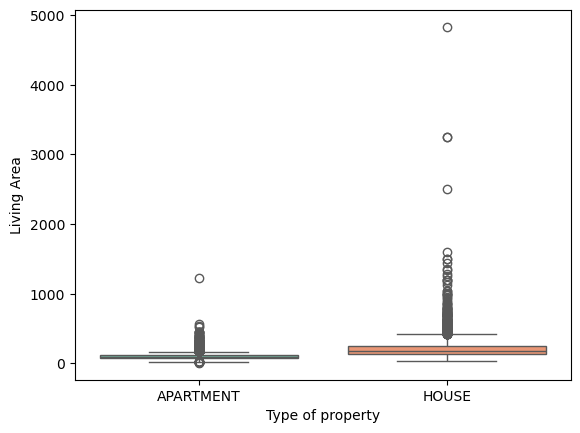

In [ ]:
sns.boxplot(x='Type of property', y='Living Area', data=data, palette='Set2')

# Add labels and title
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()

# Same conclusion as number of rooms
# Probably both are correlated

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\2292016827.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Terrace area', data=data, palette='Set2')


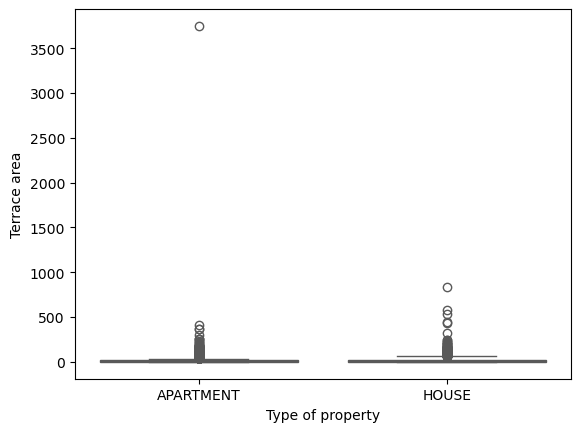

In [ ]:
sns.boxplot(x='Type of property', y='Terrace area', data=data, palette='Set2')

# Add labels and title
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()

# No visible difference, quite a few outliers, one error probably

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\973744087.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Garden area', data=data, palette='Set2')


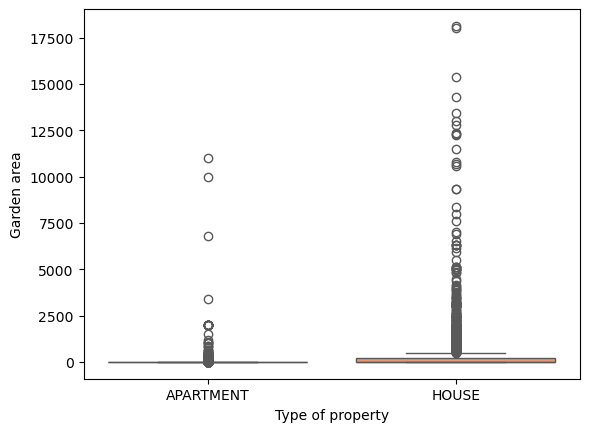

In [ ]:
sns.boxplot(x='Type of property', y='Garden area', data=data, palette='Set2')

# Add labels and title
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()

# Most apartments don't have a garden, and some more variation in houses
# many outliers

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\3526010.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Surface area of the plot of land', data=data, palette='Set2')


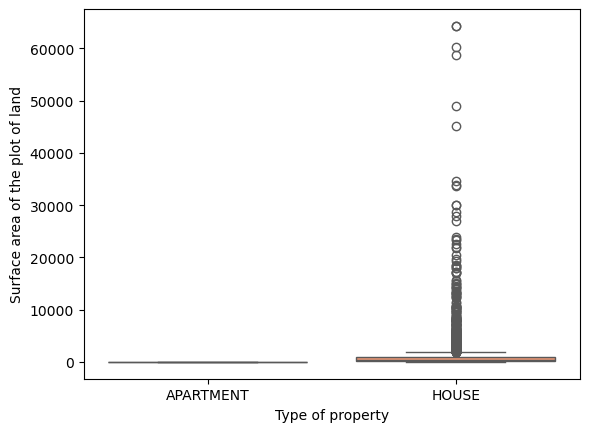

In [ ]:
sns.boxplot(x='Type of property', y='Surface area of the plot of land', data=data, palette='Set2')

# Add labels and title
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()

# Always 0 for apartments by default
# outliers for houses

In [184]:
houses = data[data['Type of property'] == 'HOUSE']

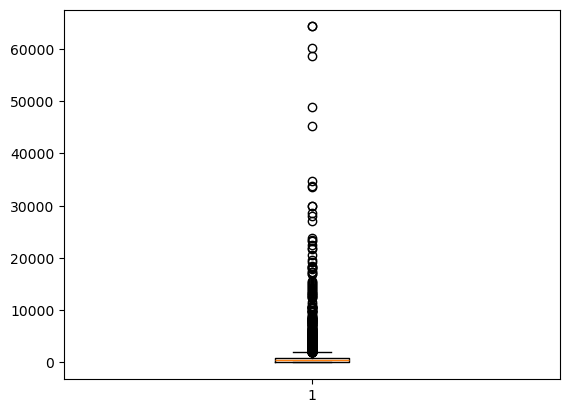

In [187]:
plt.boxplot(houses['Surface area of the plot of land'])
plt.show()

In [189]:
data[data['Surface area of the plot of land'] >= 10000]

# Concerns 65 properties...

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
329,20287191,9700,HOUSE,COUNTRY_COTTAGE,345000.0,residential_sale,3,302.0,1,0.0,...,1,NaN,0,0.0,0.0,34690.0,4.0,0,TO_RENOVATE,single
706,20290335,3450,HOUSE,HOUSE,553000.0,residential_sale,4,209.0,1,0.0,...,1,NaN,0,0.0,0.0,23503.0,3.0,0,GOOD,single
720,20285258,8610,HOUSE,FARMHOUSE,649000.0,residential_sale,5,314.0,1,0.0,...,0,0.0,0,0.0,0.0,23912.0,NaN,0,TO_RENOVATE,single
831,20286621,8740,HOUSE,VILLA,1895000.0,residential_sale,8,334.0,0,NaN,...,1,NaN,0,0.0,0.0,18262.0,4.0,0,GOOD,single
973,20262952,8750,HOUSE,COUNTRY_COTTAGE,1775000.0,residential_sale,7,696.0,0,NaN,...,1,NaN,0,0.0,0.0,19664.0,4.0,0,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14500,20320348,5590,HOUSE,MIXED_USE_BUILDING,1200000.0,residential_sale,9,556.0,1,NaN,...,1,NaN,1,13406.0,13406.0,13406.0,4.0,0,UNKNOWN,single
14612,20311372,8520,HOUSE,COUNTRY_COTTAGE,735000.0,residential_sale,4,250.0,1,NaN,...,1,NaN,0,0.0,0.0,12518.0,4.0,0,TO_RENOVATE,single
15285,20274134,3800,HOUSE,COUNTRY_COTTAGE,1298000.0,residential_sale,5,453.0,0,NaN,...,0,0.0,0,0.0,0.0,19223.0,3.0,1,AS_NEW,single
15297,20304356,1473,HOUSE,EXCEPTIONAL_PROPERTY,950000.0,residential_sale,7,382.0,0,NaN,...,0,0.0,0,0.0,0.0,15400.0,4.0,1,TO_BE_DONE_UP,single


C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\4211745384.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Number of facades', data=data, palette='Set2')


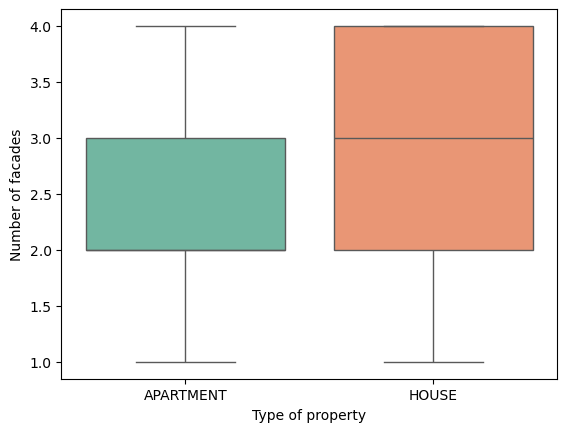

In [ ]:
sns.boxplot(x='Type of property', y='Number of facades', data=data, palette='Set2')

# Add labels and title
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()

# Difference in variance between houses and apartments
# Median is 2 for apartments, rarely 4
# Median 3 for houses, logically up to 4 for villas
# No outliers, dealt with erroneous entries before

Conclusion: there are a number of extreme values for certain variables - meaning outliers

Need to be dealt with before using advancd imputation so as no to skew the impute values

Use DBSCAN

## Dealing with outliers

### Outliers in price

There are a number of observations with outliers in price, how many for each type of property? 

Can we safely remove all outliers per property type?

In [53]:
apartments = data[data['Type of property'] == 'APARTMENT']
houses = data[data['Type of property'] == 'HOUSE']

In [54]:
# For apartments only outliers above Q3 - 612 rows

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = apartments['Price'].quantile(0.25)
Q3 = apartments['Price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier thresholds (1.5 * IQR rule)
apartments_lower_bound = Q1 - 1.5 * IQR
apartments_upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_price_apartments = apartments[apartments['Price'] > apartments_upper_bound]

# Show outliers
outliers_price_apartments

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
12,20318961,1310,APARTMENT,APARTMENT,1875000.0,residential_sale,3,260.0,1,0,...,1,34.0,0,0.0,0.0,0.0,3.0,0,AS_NEW,compound
13,20318942,1310,APARTMENT,APARTMENT,2035000.0,residential_sale,3,293.0,1,0,...,1,41.0,0,0.0,0.0,0.0,NaN,0,AS_NEW,compound
98,20301509,1180,APARTMENT,GROUND_FLOOR,735000.0,residential_sale,2,138.0,1,0,...,1,11.0,1,9.0,9.0,0.0,NaN,0,AS_NEW,compound
112,20298410,1420,APARTMENT,PENTHOUSE,750000.0,residential_sale,3,162.0,1,NaN,...,1,44.0,0,0.0,0.0,0.0,NaN,0,AS_NEW,compound
120,20320505,1040,APARTMENT,APARTMENT,995000.0,residential_sale,3,220.0,1,NaN,...,1,25.0,0,0.0,0.0,0.0,NaN,0,JUST_RENOVATED,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,20261770,9250,APARTMENT,PENTHOUSE,1095000.0,residential_sale,2,256.0,1,NaN,...,1,120.0,0,0.0,0.0,0.0,NaN,0,AS_NEW,single
15281,20097426,8620,APARTMENT,APARTMENT,1150000.0,residential_sale,3,200.0,1,1,...,1,NaN,0,0.0,0.0,0.0,2.0,0,JUST_RENOVATED,single
15321,20224648,2000,APARTMENT,APARTMENT,1165000.0,residential_sale,2,172.0,1,NaN,...,1,60.0,0,0.0,0.0,0.0,NaN,0,AS_NEW,single
15365,20122667,1050,APARTMENT,APARTMENT,800000.0,residential_sale,2,117.0,0,0,...,0,0.0,0,0.0,0.0,0.0,3.0,0,AS_NEW,single


In [56]:
# For houses only outliers above Q3 - 292 rows

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = houses['Price'].quantile(0.25)
Q3 = houses['Price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier thresholds (1.5 * IQR rule)
houses_lower_bound = Q1 - 1.5 * IQR
houses_upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_price_houses = houses[houses['Price'] > houses_upper_bound]

# Show outliers
outliers_price_houses

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Furnished,...,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
142,20316318,8540,HOUSE,VILLA,1195000.0,residential_sale,5,500.0,1,NaN,...,1,NaN,0,0.0,0.0,1560.0,4.0,1,GOOD,single
166,20307949,1150,HOUSE,HOUSE,1195000.0,residential_sale,4,303.0,1,NaN,...,0,0.0,1,250.0,250.0,428.0,3.0,0,JUST_RENOVATED,single
238,20302265,1180,HOUSE,HOUSE,1790000.0,residential_sale,5,345.0,1,0,...,1,NaN,0,0.0,0.0,680.0,4.0,0,UNKNOWN,single
298,20304574,9680,HOUSE,VILLA,1545000.0,residential_sale,4,433.0,0,1,...,1,NaN,0,0.0,0.0,8633.0,4.0,0,JUST_RENOVATED,single
306,20263033,1050,HOUSE,HOUSE,1995000.0,residential_sale,4,544.0,1,0,...,1,90.0,1,250.0,250.0,666.0,2.0,0,AS_NEW,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15418,20301033,1150,HOUSE,HOUSE,1750000.0,residential_sale,4,260.0,1,0,...,1,10.0,1,2100.0,2100.0,2200.0,3.0,0,TO_RENOVATE,single
15429,20261577,9630,HOUSE,VILLA,1100000.0,residential_sale,6,561.0,0,NaN,...,1,NaN,0,0.0,0.0,4925.0,NaN,0,GOOD,single
15432,20303201,4870,HOUSE,APARTMENT_BLOCK,1245000.0,residential_sale,12,814.0,1,0,...,1,NaN,0,0.0,0.0,28600.0,4.0,0,GOOD,single
15473,20261655,8300,HOUSE,VILLA,3395000.0,residential_sale,4,244.0,0,0,...,1,NaN,0,0.0,0.0,593.0,NaN,0,GOOD,single


Remove these outliers and concatenate to new DF

In [57]:
nonoutliers_price_apartments = apartments[apartments['Price'] <= apartments_upper_bound]
nonoutliers_price_houses = houses[houses['Price'] <= houses_upper_bound]
data_price_clean = pd.concat([nonoutliers_price_apartments, nonoutliers_price_houses], ignore_index= True)
data_price_clean.shape

(11021, 21)

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_11876\3087680001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of property', y='Price', data=data_price_clean, palette='Set2')


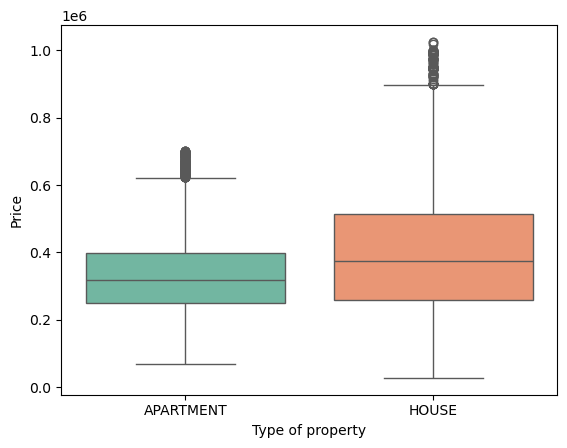

In [ ]:
# Verify with boxplot
sns.boxplot(x='Type of property', y='Price', data=data_price_clean, palette='Set2')
plt.show()

# Some difference in median, but probably not significant because of overlap in variation
# Still outliers, but recalculated Q1 and Q3 on partial dataset, the new outliers are very close together and not far outside of bounds


### Outliers in other continuous variables

1) Want to impute remaining missing values with techniques such as KNN or median/mean BUT outliers can skew this value....
2) First deal with outliers using DBSCAN on Euclidian distance
3) DBSCAN does not allow NaN missing values, so create a separate DF, impute median values (robust choice independent of outliers and extreme values), then perform DBSCAN to id outliers

- Will perform on continuous variables that are not the response - avoid data leakage to response
- Not on categorical, Euclidian distance is inappropriate (mixed dataset of continuous and categorical ; AND symmetric, double zero problem)
- Gower distance can't handle this (good for mixed dataset but not presence-absence data, giving double 0 issue again)
- Difficult to solve otherwise
- Do houses and apartments separately, some houses could become outliers as an artifact because include apartments

In [58]:
# 1. Create dataset, select only continuous numerical variables, and impute missing values with median
# Exclude surface of the land, as it is a copy of Garden area

df_apartments = nonoutliers_price_apartments[['id','Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface area of the plot of land', 'Number of facades']]
df_houses = nonoutliers_price_houses[['id','Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface area of the plot of land', 'Number of facades']]

temp_imputer_apartments = SimpleImputer(strategy='median')
df_apartments_temp_imputed = pd.DataFrame(temp_imputer_apartments.fit_transform(df_apartments), columns=df_apartments.columns)

temp_imputer_houses = SimpleImputer(strategy='median')
df_houses_temp_imputed = pd.DataFrame(temp_imputer_houses.fit_transform(df_houses), columns=df_houses.columns)

# As an example

df_apartments_temp_imputed

,id,Number of rooms,Living Area,Terrace area,Garden area,Surface area of the plot of land,Number of facades
0,20320744.0,3.0,160.0,40.0,290.0,0.0,2.0
1,20317718.0,3.0,96.0,29.0,0.0,0.0,2.0
2,20315842.0,1.0,76.0,12.0,0.0,0.0,2.0
3,20315799.0,1.0,81.0,13.0,0.0,0.0,2.0
4,20315776.0,3.0,101.0,13.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
7101,20207974.0,2.0,88.0,9.0,0.0,0.0,2.0
7102,20020923.0,2.0,92.0,6.0,0.0,0.0,2.0
7103,20109298.0,2.0,62.0,0.0,0.0,0.0,2.0
7104,20280461.0,3.0,75.0,5.0,0.0,0.0,2.0


In [59]:
# Step 2: Scale the data - important for DBSCAN when features in different scales

columns_to_scale = ['Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface area of the plot of land', 'Number of facades']

scaler_apartments = StandardScaler()
apartments_scaled_data = scaler_apartments.fit_transform(df_apartments_temp_imputed[columns_to_scale])

scaler_houses = StandardScaler()
houses_scaled_data = scaler_houses.fit_transform(df_houses_temp_imputed[columns_to_scale])

# Create dataframe for results

scaled_apartments = pd.DataFrame(apartments_scaled_data, columns=columns_to_scale, index=df_apartments_temp_imputed.index)
scaled_houses = pd.DataFrame(houses_scaled_data, columns=columns_to_scale, index=df_houses_temp_imputed.index)

# Add id back into Df

apartments_scaled = df_apartments_temp_imputed.copy()
houses_scaled = df_houses_temp_imputed.copy()

apartments_scaled[columns_to_scale] = scaled_apartments
houses_scaled[columns_to_scale] = scaled_houses


# NOT use standard scaler, many outliers, use robust scaler based on median and IQR

#apartments_scaler = RobustScaler()
#apartments_scaled_data = apartments_scaler.fit_transform(df_apartments_temp_imputed)

#houses_scaler = RobustScaler()
#houses_scaled_data = houses_scaler.fit_transform(df_houses_temp_imputed)

#houses_scaled_data

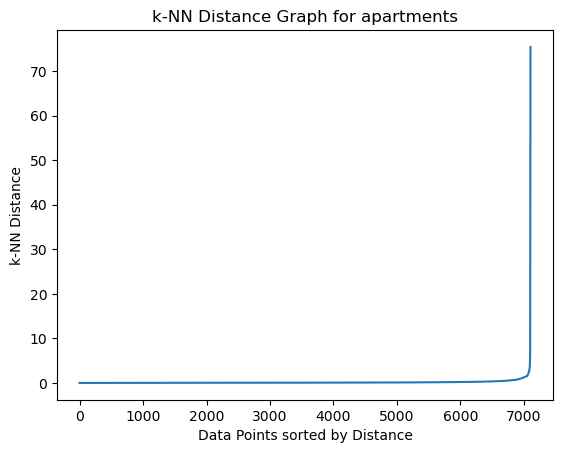

In [60]:
# Step 3: Apply DBSCAN

columns_to_apply = ['Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface area of the plot of land', 'Number of facades']

# 3.1 Selecting optimal values for parameter epsilon and min_samples

# 3.1.1 Min_samples
# min_samples = dimensionality of the data + 1 = 7
# DataCamp, min_samples = 2 * number features

min_samples = 12

# 3.1.2 Epsilon - Using the k-Nearest Neighbors (k-NN) Distance Plot:

#Plotting the k-distance graph can help estimate an appropriate value for eps. The "k-distance" is the distance from each point to its k-th nearest neighbor (often k = min_samples).
#The value of eps can be chosen at the "elbow" point where the curve shows a significant change in slope.

##### Fit NearestNeighbors
neighbors_apartments = NearestNeighbors(n_neighbors=min_samples)  # n_neighbors = min_samples - 1 or min_samples
neighbors_apartments.fit(apartments_scaled[columns_to_apply])
distances_apartments, indices_apartments = neighbors_apartments.kneighbors(apartments_scaled[columns_to_apply])

# Sort and plot distances
distances_apartments = np.sort(distances_apartments[:, min_samples-1])  # Take the k-th neighbor distances
plt.plot(distances_apartments)
plt.xlabel('Data Points sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('k-NN Distance Graph for apartments')
plt.show()

##### Interpreting the plot: The eps value should be set near the "elbow" of the plot where the distances increase sharply. This indicates the threshold where points transition from being clustered to noise.

# The plot indicates the possible absence of outliers, because the distance jumps from 0 to max in short period

In [61]:
# 3.1.3 - Optimal parameter values using linear grid search and silhouette score

best_score_appt = -1
best_params_appt = (None, None)

for eps in np.linspace(0.1, 4, num=10):  # Adjust range as needed
    for min_samples in range(10, 15):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(apartments_scaled[columns_to_apply])
        labels = db.labels_
        # Only calculate silhouette score if more than 1 cluster is formed
        if len(set(labels)) > 1:
            score = silhouette_score(apartments_scaled[columns_to_apply], labels)
            if score > best_score_appt:
                best_score_appt = score
                best_params_appt = (eps, min_samples)
                print(f"adjusted to better params for eps= {eps} and min_samples= {min_samples}")
        else:
            print(f"Only one cluster found for eps= {eps} and min_samples= {min_samples}")

print(f'Best silhouette score: {best_score_appt:.2f} with eps={best_params_appt[0]:.2f} and min_samples={best_params_appt[1]}')

adjusted to better params for eps= 0.1 and min_samples= 10
adjusted to better params for eps= 0.1 and min_samples= 11
adjusted to better params for eps= 0.1 and min_samples= 14
adjusted to better params for eps= 0.5333333333333333 and min_samples= 10
adjusted to better params for eps= 0.9666666666666667 and min_samples= 10
adjusted to better params for eps= 0.9666666666666667 and min_samples= 11
adjusted to better params for eps= 0.9666666666666667 and min_samples= 12
adjusted to better params for eps= 0.9666666666666667 and min_samples= 13
adjusted to better params for eps= 1.8333333333333335 and min_samples= 10
adjusted to better params for eps= 2.266666666666667 and min_samples= 10
adjusted to better params for eps= 3.566666666666667 and min_samples= 10
Best silhouette score: 0.95 with eps=3.57 and min_samples=10


Silhouette score 0.71 - 1 = strong structure found

Best silhouette score: 0.95 with eps=3.57 and min_samples=10


In [62]:
# 3.2 applying DBSCAN to identify outliers

dbscan_apartments = DBSCAN(eps=3.57, min_samples=10)  # Parameters may need tuning
clusters_apartments = dbscan_apartments.fit_predict(apartments_scaled[columns_to_apply])

df_apartments_temp_imputed['DBSCAN_Cluster'] = clusters_apartments

df_apartments_temp_imputed

,id,Number of rooms,Living Area,Terrace area,Garden area,Surface area of the plot of land,Number of facades,DBSCAN_Cluster
0,20320744.0,3.0,160.0,40.0,290.0,0.0,2.0,0
1,20317718.0,3.0,96.0,29.0,0.0,0.0,2.0,0
2,20315842.0,1.0,76.0,12.0,0.0,0.0,2.0,0
3,20315799.0,1.0,81.0,13.0,0.0,0.0,2.0,0
4,20315776.0,3.0,101.0,13.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...
7101,20207974.0,2.0,88.0,9.0,0.0,0.0,2.0,0
7102,20020923.0,2.0,92.0,6.0,0.0,0.0,2.0,0
7103,20109298.0,2.0,62.0,0.0,0.0,0.0,2.0,0
7104,20280461.0,3.0,75.0,5.0,0.0,0.0,2.0,0


In [63]:
df_apartments_temp_imputed['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    7100
-1       6
Name: count, dtype: int64

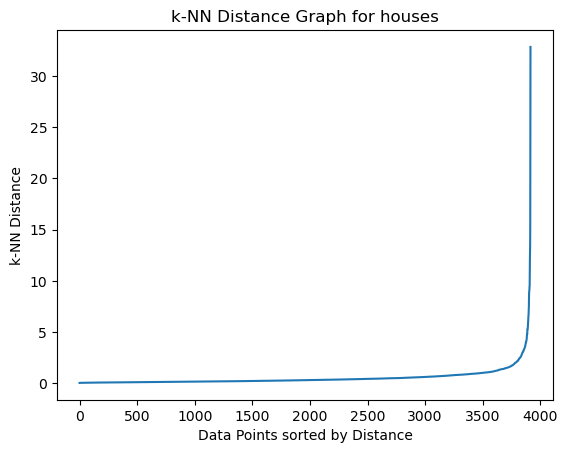

In [64]:
# Idem for houses

# Step 3: Apply DBSCAN
# 3.1 Selecting optimal values for parameter epsilon and min_samples
# 3.1.1 Min_samples
# min_samples = dimensionality of the data + 1

min_samples = 12

# 3.1.2 Epsilon - Using the k-Nearest Neighbors (k-NN) Distance Plot:

#Plotting the k-distance graph can help estimate an appropriate value for eps. The "k-distance" is the distance from each point to its k-th nearest neighbor (often k = min_samples).
#The value of eps can be chosen at the "elbow" point where the curve shows a significant change in slope.

##### Fit NearestNeighbors
neighbors_houses = NearestNeighbors(n_neighbors=min_samples)  # n_neighbors = min_samples - 1
neighbors_houses.fit(houses_scaled[columns_to_apply])
distances_houses, indices_houses = neighbors_houses.kneighbors(houses_scaled[columns_to_apply])

# Sort and plot distances
distances_houses = np.sort(distances_houses[:, min_samples-1])  # Take the k-th neighbor distances
plt.plot(distances_houses)
plt.xlabel('Data Points sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('k-NN Distance Graph for houses')
plt.show()

# Plot indicates optimum at 3500 - 4000

In [65]:
# 3.1.3 - Optimal parameter values using linear grid search and silhouette score

best_score_houses = -1
best_params_houses = (None, None)

for eps in np.linspace(1, 4, num=10):  # Adjust range as needed
    for min_samples in range(10, 15):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(houses_scaled[columns_to_apply])
        labels = db.labels_
        # Only calculate silhouette score if more than 1 cluster is formed
        if len(set(labels)) > 1:
            score = silhouette_score(houses_scaled[columns_to_apply], labels)
            if score > best_score_houses:
                best_score_houses = score
                best_params_houses = (eps, min_samples)
                print(f"adjusted to better params for eps= {eps} and min_samples= {min_samples}")
        else:
            print(f"Only one cluster found for eps= {eps} and min_samples= {min_samples}")

print(f'Best silhouette score: {best_score_houses:.2f} with eps={best_params_houses[0]:.2f} and min_samples={best_params_houses[1]}')

adjusted to better params for eps= 1.0 and min_samples= 10
adjusted to better params for eps= 1.0 and min_samples= 11
adjusted to better params for eps= 1.3333333333333333 and min_samples= 10
adjusted to better params for eps= 1.6666666666666665 and min_samples= 10
adjusted to better params for eps= 2.0 and min_samples= 10
adjusted to better params for eps= 2.333333333333333 and min_samples= 10
adjusted to better params for eps= 2.6666666666666665 and min_samples= 10
adjusted to better params for eps= 3.0 and min_samples= 10
adjusted to better params for eps= 3.333333333333333 and min_samples= 10
adjusted to better params for eps= 3.6666666666666665 and min_samples= 10
adjusted to better params for eps= 4.0 and min_samples= 10
Best silhouette score: 0.85 with eps=4.00 and min_samples=10


Best silhouette score: 0.85 with eps=4.00 and min_samples=10

In [66]:
# 3.2 applying DBSCAN to identify outliers

dbscan_houses = DBSCAN(eps=4, min_samples=10)  # Parameters may need tuning
clusters_houses = dbscan_houses.fit_predict(houses_scaled[columns_to_apply])

df_houses_temp_imputed['DBSCAN_Cluster'] = clusters_houses

In [67]:
df_houses_temp_imputed['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    3897
-1      18
Name: count, dtype: int64

In [110]:
# Step 4: Identify outliers

outliers_apartments = df_apartments_temp_imputed[df_apartments_temp_imputed['DBSCAN_Cluster'] == -1]
outliers_houses = df_houses_temp_imputed[df_houses_temp_imputed['DBSCAN_Cluster'] == -1]

outliers_apartments


,id,Number of rooms,Living Area,Terrace area,Garden area,Surface area of the plot of land,Number of facades,DBSCAN_Cluster
4115,20302351.0,3.0,129.0,3749.0,60.0,0.0,3.0,-1
4354,20067628.0,2.0,100.0,19.0,11000.0,0.0,4.0,-1
4412,20294814.0,3.0,1230.0,53.0,0.0,0.0,4.0,-1
6746,20316412.0,5.0,526.0,125.0,0.0,0.0,2.0,-1
6948,20063113.0,3.0,115.0,55.0,6803.0,0.0,2.0,-1
7015,20311635.0,2.0,75.0,13.0,10000.0,0.0,4.0,-1


Conclusion: DBSCAN identified 24 outliers based on multivariate analysis including only predictor variables.

In [68]:
# Remove outliers from the original DataFrame

nonoutliers_apartments = df_apartments_temp_imputed[df_apartments_temp_imputed['DBSCAN_Cluster'] != -1]
apartment_price_outliers_clean = nonoutliers_price_apartments[nonoutliers_price_apartments['id'].isin(nonoutliers_apartments['id'])]

nonoutliers_houses = df_houses_temp_imputed[df_houses_temp_imputed['DBSCAN_Cluster'] != -1]
houses_price_ouliers_clean = nonoutliers_price_houses[nonoutliers_price_houses['id'].isin(nonoutliers_houses['id'])]
houses_price_ouliers_clean.shape

(3897, 21)

In [190]:
houses_price_ouliers_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3897 entries, 70 to 15494
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3897 non-null   int64  
 1   Locality                          3897 non-null   object 
 2   Type of property                  3897 non-null   object 
 3   Subtype of property               3897 non-null   object 
 4   Price                             3897 non-null   float64
 5   Type of sale                      3897 non-null   object 
 6   Number of rooms                   3897 non-null   int64  
 7   Living Area                       3848 non-null   float64
 8   Fully equipped kitchen            3897 non-null   object 
 9   Furnished                         1827 non-null   object 
 10  Fireplace                         3897 non-null   object 
 11  Terrace                           3897 non-null   object 
 12  Terrace a

In [69]:
# Step 5: Impute missing values using KNN

columns_to_apply = ['Price', 'Number of rooms', 'Living Area', 'Furnished', 'Terrace area', 'Number of facades']

knn_imputer_apartments = KNNImputer(n_neighbors=7, weights= 'distance')
apartments_imputed = pd.DataFrame(knn_imputer_apartments.fit_transform(apartment_price_outliers_clean[columns_to_apply]), 
                                  columns=apartment_price_outliers_clean[columns_to_apply].columns)

apartments_imputed.index = apartment_price_outliers_clean.index

# round categoricals

apartments_imputed['Furnished'] = np.round(apartments_imputed['Furnished'])
apartments_imputed['Number of facades'] = np.round(apartments_imputed['Number of facades'])

# Add back to original dataset

copy_columns = []
for column in apartment_price_outliers_clean.columns:
    if column not in columns_to_apply:
        copy_columns.append(column)

apartments_clean = apartment_price_outliers_clean[copy_columns].copy(deep= True)

for column in columns_to_apply:
    apartments_clean[column] = apartments_imputed[column]

apartments_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7100 entries, 0 to 15515
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7100 non-null   int64  
 1   Locality                          7100 non-null   object 
 2   Type of property                  7100 non-null   object 
 3   Subtype of property               7100 non-null   object 
 4   Type of sale                      7100 non-null   object 
 5   Fully equipped kitchen            7100 non-null   object 
 6   Fireplace                         7100 non-null   object 
 7   Terrace                           7100 non-null   object 
 8   Garden                            7100 non-null   object 
 9   Garden area                       7100 non-null   float64
 10  Surface of the land               7100 non-null   float64
 11  Surface area of the plot of land  7100 non-null   float64
 12  Swimming p

In [70]:
# Step 5 for houses: Impute missing values using KNN
knn_imputer_houses = KNNImputer(n_neighbors=7, weights= 'distance')
houses_imputed = pd.DataFrame(knn_imputer_houses.fit_transform(houses_price_ouliers_clean[columns_to_apply]), columns=houses_price_ouliers_clean[columns_to_apply].columns)

houses_imputed.index = houses_price_ouliers_clean.index
# round categoricals

houses_imputed['Furnished'] = np.round(houses_imputed['Furnished'])
houses_imputed['Number of facades'] = np.round(houses_imputed['Number of facades'])

# Add back to original dataset

copy_columns = []
for column in houses_price_ouliers_clean.columns:
    if column not in columns_to_apply:
        copy_columns.append(column)

houses_clean = houses_price_ouliers_clean[copy_columns].copy(deep= True)

for column in columns_to_apply:
    houses_clean[column] = houses_imputed[column]

houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3897 entries, 70 to 15494
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3897 non-null   int64  
 1   Locality                          3897 non-null   object 
 2   Type of property                  3897 non-null   object 
 3   Subtype of property               3897 non-null   object 
 4   Type of sale                      3897 non-null   object 
 5   Fully equipped kitchen            3897 non-null   object 
 6   Fireplace                         3897 non-null   object 
 7   Terrace                           3897 non-null   object 
 8   Garden                            3897 non-null   object 
 9   Garden area                       3897 non-null   float64
 10  Surface of the land               3897 non-null   float64
 11  Surface area of the plot of land  3897 non-null   float64
 12  Swimming 

In [219]:
houses_clean.reset_index()

,index,id,Locality,Type of property,Subtype of property,Type of sale,Fully equipped kitchen,Fireplace,Terrace,Garden,...,Surface area of the plot of land,Swimming pool,State of the building,Compound Listing,Price,Number of rooms,Living Area,Furnished,Terrace area,Number of facades
0,70,20316101,1780,HOUSE,APARTMENT_BLOCK,residential_sale,1,0,1,1,...,268.0,0,JUST_RENOVATED,single,669900.0,6.0,220.0,0.0,6.000000,2.0
1,71,20315988,8500,HOUSE,HOUSE,residential_sale,1,0,1,1,...,94.0,0,GOOD,single,164500.0,3.0,120.0,0.0,20.000000,2.0
2,72,20317278,9600,HOUSE,MANSION,residential_sale,1,0,1,0,...,1919.0,0,AS_NEW,single,695000.0,5.0,428.0,0.0,67.728351,4.0
3,76,20315041,9000,HOUSE,HOUSE,residential_sale,1,0,1,1,...,406.0,0,TO_BE_DONE_UP,single,595000.0,3.0,221.0,0.0,4.723006,3.0
4,77,20315700,9940,HOUSE,HOUSE,residential_sale,1,0,1,0,...,1485.0,0,GOOD,single,579000.0,3.0,285.0,0.0,16.794911,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,15485,20218101,9900,HOUSE,HOUSE,residential_sale,1,0,1,0,...,110.0,0,TO_RENOVATE,single,179000.0,2.0,170.0,0.0,27.560968,3.0
3893,15487,20159909,9860,HOUSE,HOUSE,residential_sale,0,0,1,0,...,340.0,0,TO_BE_DONE_UP,single,249000.0,3.0,141.0,0.0,5.430545,3.0
3894,15488,20162961,3530,HOUSE,HOUSE,residential_sale,0,0,0,0,...,2108.0,0,TO_RENOVATE,single,299000.0,3.0,190.0,0.0,0.000000,3.0
3895,15490,11376970,9310,HOUSE,MIXED_USE_BUILDING,residential_sale,0,0,1,1,...,565.0,0,TO_BE_DONE_UP,single,395000.0,7.0,431.0,0.0,25.000000,2.0


In [218]:
apartments_clean

,id,Locality,Type of property,Subtype of property,Type of sale,Fully equipped kitchen,Fireplace,Terrace,Garden,Garden area,...,Surface area of the plot of land,Swimming pool,State of the building,Compound Listing,Price,Number of rooms,Living Area,Furnished,Terrace area,Number of facades
0,20320744,1150,APARTMENT,APARTMENT,residential_sale,1,0,1,1,290.0,...,0.0,0,GOOD,single,575000.0,3.0,160.000000,0.0,40.000000,3.0
1,20317718,9000,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,AS_NEW,compound,390000.0,3.0,96.000000,0.0,29.000000,2.0
2,20315842,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,GOOD,compound,260000.0,1.0,76.000000,0.0,12.000000,3.0
3,20315799,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,GOOD,compound,325000.0,1.0,81.000000,0.0,13.000000,3.0
4,20315776,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,GOOD,compound,365000.0,3.0,101.000000,0.0,13.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,20207974,8660,APARTMENT,APARTMENT,residential_sale,0,0,1,0,0.0,...,0.0,0,AS_NEW,single,375000.0,2.0,117.714286,0.0,16.428571,3.0
15505,20020923,1000,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,AS_NEW,single,455000.0,2.0,50.000000,0.0,0.000000,2.0
15506,20109298,8300,APARTMENT,APARTMENT,residential_sale,0,0,0,0,0.0,...,0.0,0,AS_NEW,single,595000.0,2.0,99.000000,0.0,22.800000,2.0
15509,20280461,2100,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,AS_NEW,single,249900.0,3.0,94.195443,0.0,12.238400,3.0


In [71]:
# Step 6 Create clean and filled dataset without outliers or missing values

data_clean = pd.concat([apartments_clean, houses_clean], ignore_index= True)

In [ ]:
# Sanity check

data.shape

(11925, 21)

In [226]:
outliers_price_apartments.shape

(612, 21)

In [227]:
outliers_price_houses.shape

(292, 21)

In [224]:
data_price_clean.shape

(11021, 21)

In [228]:
outliers_houses.shape

(18, 8)

In [230]:
outliers_apartments.shape

(6, 8)

In [72]:
data_clean.shape

(10997, 21)

In [73]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10997 entries, 0 to 10996
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10997 non-null  int64  
 1   Locality                          10997 non-null  object 
 2   Type of property                  10997 non-null  object 
 3   Subtype of property               10997 non-null  object 
 4   Type of sale                      10997 non-null  object 
 5   Fully equipped kitchen            10997 non-null  object 
 6   Fireplace                         10997 non-null  object 
 7   Terrace                           10997 non-null  object 
 8   Garden                            10997 non-null  object 
 9   Garden area                       10997 non-null  float64
 10  Surface of the land               10997 non-null  float64
 11  Surface area of the plot of land  10997 non-null  float64
 12  Swim

In [ ]:
data_clean.to_csv('./Data/Clean_data.csv')